In [61]:
#Dependencies and api_keys
import requests
from pprint import pprint
from config import census_key
import json
import pandas as pd
from matplotlib import pyplot as plt

In [62]:
census_original_df = pd.read_csv("./census_output.csv")
census_original_df = census_original_df.drop("Unnamed: 0",axis=1)
census_original_df.head()

,County,Origin,2009IN,2009NET,state,county,2010IN,2010NET,2011IN,2011NET,2012IN,2012NET,2013IN,2013NET,2014IN,2014NET,2015IN,2015NET
0,"Autauga County, Alabama",Asia,32.0,NaN,1,1,16.0,NaN,17.0,NaN,15,NaN,21,NaN,39,NaN,42,NaN
1,"Autauga County, Alabama",Europe,37.0,NaN,1,1,50.0,NaN,34.0,NaN,21,NaN,51,NaN,44,NaN,55,NaN
2,"Autauga County, Alabama","Baldwin County, Alabama",35.0,28.0,1,1,38.0,27.0,78.0,71.0,119,92.0,116,54.0,77,-11.0,54,-76.0
3,"Autauga County, Alabama","Barbour County, Alabama",0.0,-18.0,1,1,0.0,-15.0,13.0,3.0,7,0.0,4,-6.0,4,4.0,6,6.0
4,"Autauga County, Alabama","Bibb County, Alabama",38.0,38.0,1,1,44.0,44.0,31.0,16.0,32,-132.0,0,-118.0,0,-141.0,0,-149.0


In [63]:
census_df = census_original_df.groupby(census_original_df["County"]).sum()
census_df = census_df.reset_index()
census_df

,County,2009IN,2009NET,state,county,2010IN,2010NET,2011IN,2011NET,2012IN,2012NET,2013IN,2013NET,2014IN,2014NET,2015IN,2015NET
0,"Abbeville County, South Carolina",1210.0,190.0,720,16,1094.0,-133.0,963.0,-121.0,1038,-78.0,1306,-87.0,1039,-374.0,1034,35.0
1,"Acadia Parish, Louisiana",2082.0,-862.0,660,30,2129.0,-45.0,1996.0,-572.0,1949,-672.0,2356,-400.0,2341,-433.0,2261,-1021.0
2,"Ada County, Idaho",26673.0,4034.0,3136,196,25963.0,3388.0,22795.0,1299.0,23941,1596.0,23428,-175.0,23238,629.0,23585,928.0
3,"Adair County, Iowa",273.0,-166.0,209,11,143.0,-162.0,189.0,-261.0,209,-237.0,243,-217.0,256,-159.0,310,-166.0
4,"Adair County, Kentucky",896.0,153.0,378,18,686.0,20.0,544.0,-185.0,528,-150.0,467,25.0,576,196.0,478,-67.0
5,"Adair County, Missouri",2389.0,643.0,1537,53,2245.0,547.0,2602.0,826.0,2385,302.0,2358,223.0,2356,89.0,2374,-103.0
6,"Adair County, Oklahoma",217.0,-1127.0,680,17,195.0,-1291.0,498.0,-862.0,448,-889.0,330,-809.0,410,-524.0,501,-373.0
7,"Adams County, Colorado",36313.0,5386.0,1336,167,36404.0,4927.0,36864.0,3041.0,37394,2684.0,36539,3100.0,35885,2096.0,35232,2090.0
8,"Adams County, Idaho",190.0,-97.0,112,21,192.0,-8.0,237.0,123.0,271,116.0,222,123.0,162,24.0,198,-31.0
9,"Adams County, Illinois",1904.0,-65.0,833,49,1622.0,-392.0,1577.0,-349.0,1507,-356.0,1430,-733.0,1293,-1021.0,969,-1468.0


In [64]:
county_lookup = pd.read_csv("./quandl_convert.csv")
county_lookup = county_lookup.rename(columns={"FULL1_NAME":"County","County":"County Code"})
county_lookup.head()

,County,County Code
0,"Abbeville County, South Carolina",1795
1,"Acadia County, Louisiana",2166
2,"Accomack County, Virginia",1694
3,"Ada County, Idaho",1203
4,"Adair County, Iowa",2546


In [65]:
county_merge = census_df.merge(county_lookup,on="County")

In [66]:
zil_output = pd.read_csv('./zillow_calc.csv')
zil_output = zil_output.drop("Unnamed: 0",axis=1)
zil_output = zil_output.rename(columns={"County":"County Code"})
zil_output
zil_census_merge = county_merge.merge(zil_output,on="County Code")
zil_census_merge

,County,2009IN,2009NET,state,county,2010IN,2010NET,2011IN,2011NET,2012IN,...,2014 Difference,2015 Difference,2016 Difference,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change
0,"Ada County, Idaho",26673.0,4034.0,3136,196,25963.0,3388.0,22795.0,1299.0,23941,...,7800.0,14500,24400.0,-8.181316,-7.043949,6.282383,15.661182,4.109589,7.338057,11.504008
1,"Adair County, Missouri",2389.0,643.0,1537,53,2245.0,547.0,2602.0,826.0,2385,...,4000.0,5400,5400.0,-11.207970,-4.207574,-1.464129,0.000000,5.943536,7.573633,7.040417
2,"Adams County, Colorado",36313.0,5386.0,1336,167,36404.0,4927.0,36864.0,3041.0,37394,...,27100.0,35500,31700.0,-3.395785,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462
3,"Adams County, Idaho",190.0,-97.0,112,21,192.0,-8.0,237.0,123.0,271,...,8600.0,11600,38300.0,-10.820669,-3.340150,2.538787,8.940853,5.429293,6.946108,21.444569
4,"Adams County, Illinois",1904.0,-65.0,833,49,1622.0,-392.0,1577.0,-349.0,1507,...,2600.0,3100,1300.0,1.573034,0.331858,1.764057,0.975081,2.789700,3.235908,1.314459
5,"Adams County, Indiana",605.0,-377.0,288,16,552.0,-449.0,542.0,-432.0,483,...,3800.0,3100,5400.0,-0.597015,0.000000,0.200200,0.099900,3.792415,2.980769,5.042017
6,"Adams County, Mississippi",796.0,-257.0,672,24,605.0,-500.0,433.0,-429.0,490,...,3000.0,3100,25900.0,1.527615,-1.736111,2.709069,-1.490826,3.492433,3.487064,28.152174
7,"Adams County, North Dakota",143.0,-11.0,342,9,143.0,-39.0,113.0,-25.0,114,...,0.0,0,3500.0,NaN,NaN,-0.120627,0.000000,0.000000,0.000000,4.227053
8,"Adams County, Ohio",783.0,-351.0,741,19,688.0,-286.0,732.0,-185.0,651,...,2600.0,6500,-400.0,10.726073,7.451565,-8.460472,-4.393939,4.120444,9.893455,-0.554017
9,"Adams County, Pennsylvania",4952.0,1013.0,2730,65,4529.0,108.0,3759.0,-1264.0,4086,...,14600.0,-9000,17300.0,-4.747001,-4.874042,0.460564,-4.584527,8.768769,-4.969630,10.052295


In [67]:
zil_census_merge.to_csv('./zillow_census_m_OUTPUT.csv')

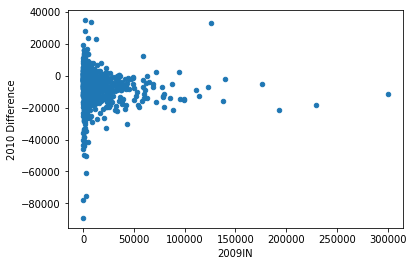

In [68]:
zil_census_merge.plot.scatter("2009IN","2010 Difference" , s=None, c=None)
plt.show()